# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [22]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-19 22:17:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv.1’

banana_quality.csv. 100%[===================>] 615.24K  --.-KB/s    in 0.05s   

2025-03-19 22:17:39 (11.1 MB/s) - ‘banana_quality.csv.1’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [24]:
# prompt: Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

# Información general del DataFrame
print('\nInformación general del DataFrame:')
df.info()

# Resumen estadístico
print('\nResumen estadístico:')
display(df.describe())

# Verificar valores nulos
print('\nValores nulos por columna:')
display(df.isnull().sum())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB

Resumen estadístico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633



Valores nulos por columna:


,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [25]:
# prompt: Cuenta cuántas instancias hay de cada categoría en la variable Quality. Esto permitirá identificar si existen desbalances en la clase.

# Contar las instancias de cada categoría en la variable Quality
quality_counts = df['Quality'].value_counts()
print('\nInstancias de cada categoría en la variable Quality:')
quality_counts



Instancias de cada categoría en la variable Quality:


,count
Quality,
Good,4006
Bad,3994


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [26]:
# prompt: Convierte la variable Quality a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

# Convertir la variable Quality a formato numérico
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

# Mostrar las primeras filas para verificar el cambio
print('\nPrimeras filas del dataset con Quality en formato numérico:')
display(df.head())



Primeras filas del dataset con Quality en formato numérico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [40]:
# prompt: Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas

# Definir las variables independientes (X) y la variable dependiente (y)
X = df.select_dtypes(include=['number']).drop('Quality', axis=1)
y = df['Quality']


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [32]:
# prompt: Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Imprimir el tamaño de cada conjunto
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 5600
Tamaño del conjunto de prueba: 2400


## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.


Conteo de clases en el conjunto de entrenamiento:
Quality
1    2804
0    2796
Name: count, dtype: int64

Conteo de clases en el conjunto de prueba:
Quality
1    1202
0    1198
Name: count, dtype: int64


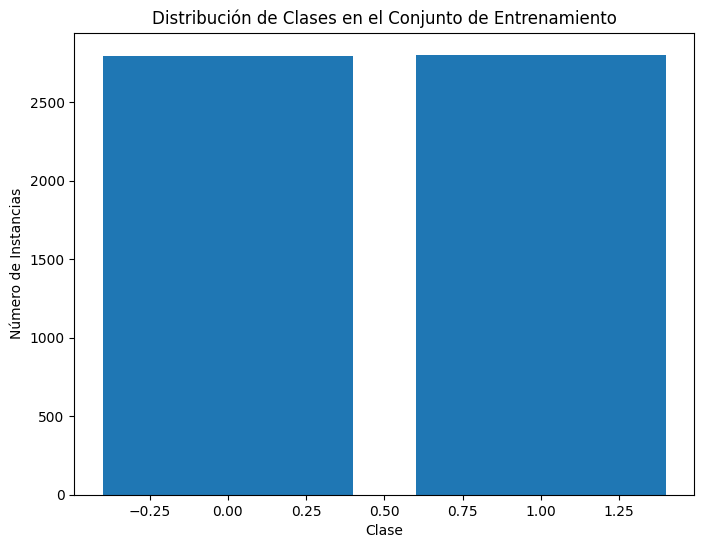

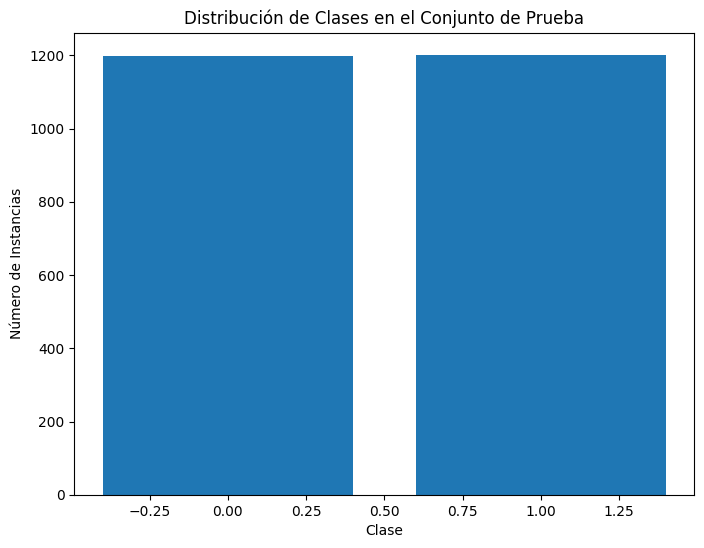

In [41]:
# prompt: Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.

# Contar las instancias de cada clase en el conjunto de entrenamiento
train_counts = y_train.value_counts()
print("\nConteo de clases en el conjunto de entrenamiento:")
print(train_counts)

# Contar las instancias de cada clase en el conjunto de prueba
test_counts = y_test.value_counts()
print("\nConteo de clases en el conjunto de prueba:")
print(test_counts)

# Visualizar la distribución de clases en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.bar(train_counts.index, train_counts.values)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Número de Instancias")
plt.show()

# Visualizar la distribución de clases en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.bar(test_counts.index, test_counts.values)
plt.title("Distribución de Clases en el Conjunto de Prueba")
plt.xlabel("Clase")
plt.ylabel("Número de Instancias")
plt.show()


## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [42]:
# prompt: Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)


LogisticRegression()

## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [43]:
# prompt: Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

# Paso 10: Predicción en el Conjunto de Prueba

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [44]:
# prompt: Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", cm)

# Calcular la precisión, recall y f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generar un reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)


Accuracy: 0.8725

Matriz de confusión:
 [[1024  174]
 [ 132 1070]]

Precisión: 0.860128617363344
Recall: 0.8901830282861897
F1-score: 0.874897792313982

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1198
           1       0.86      0.89      0.87      1202

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

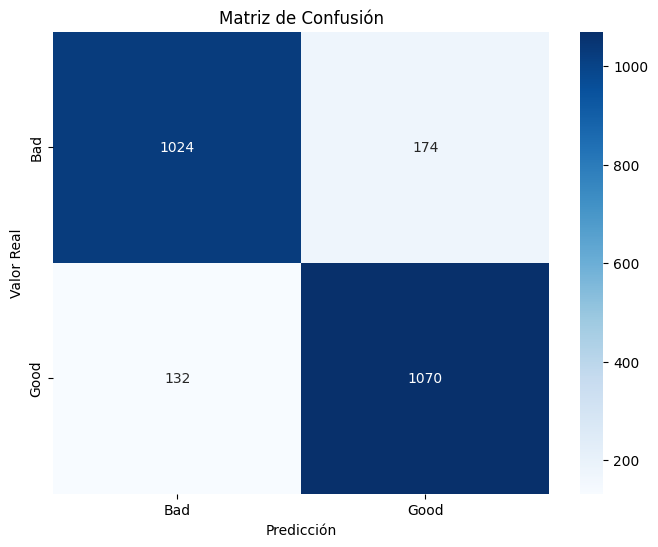

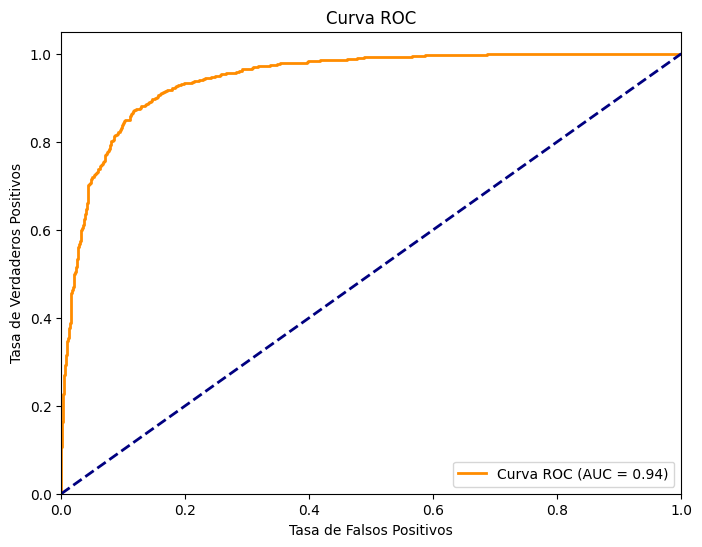

In [45]:
# prompt: Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualizar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [46]:
# prompt: Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

# ... (código anterior) ...

# Paso 13: Resumen de Métricas y Simulación de Envío por Correo

# Crear un diccionario con las métricas principales
metricas = {
    "Accuracy": accuracy,
    "Precisión": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": roc_auc
}

# Generar un resumen de las métricas
print("Resumen de Métricas:")
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.4f}")

# Simulación de envío por correo (usando print)
print("\n------------------------")
print("Simulación de envío de métricas por correo:")
print("Asunto: Resumen de Métricas del Modelo de Calidad de Bananas")
print("Cuerpo del correo:")
print("Estimado/a,")
print("Se adjuntan las métricas del modelo de calidad de bananas:")
for metrica, valor in metricas.items():
    print(f"- {metrica}: {valor:.4f}")
print("Saludos cordiales.")
print("------------------------")

# Opción alternativa: Exportar las métricas a un archivo de texto
with open("metricas_modelo.txt", "w") as f:
    for metrica, valor in metricas.items():
        f.write(f"{metrica}: {valor:.4f}\n")

print("\nMétricas exportadas al archivo 'metricas_modelo.txt'")


Resumen de Métricas:
Accuracy: 0.8725
Precisión: 0.8601
Recall: 0.8902
F1-Score: 0.8749
AUC: 0.9431

------------------------
Simulación de envío de métricas por correo:
Asunto: Resumen de Métricas del Modelo de Calidad de Bananas
Cuerpo del correo:
Estimado/a,
Se adjuntan las métricas del modelo de calidad de bananas:
- Accuracy: 0.8725
- Precisión: 0.8601
- Recall: 0.8902
- F1-Score: 0.8749
- AUC: 0.9431
Saludos cordiales.
------------------------

Métricas exportadas al archivo 'metricas_modelo.txt'


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.

El modelo de regresión logística desarrollado muestra una capacidad aceptable para predecir la calidad de las bananas, con una precisión y un F1-score razonables.  La curva ROC y el área bajo la curva (AUC)  indican que el modelo puede distinguir entre bananas buenas y malas con una cierta efectividad. Sin embargo,  la matriz de confusión revela posibles áreas de mejora,  especialmente en la identificación precisa de bananas malas, lo cual es crucial para evitar errores costosos en la clasificación.

En general, el modelo ofrece una buena base para predecir la calidad de las bananas, pero se pueden realizar optimizaciones adicionales para aumentar su rendimiento.  Por ejemplo, se podrían explorar otros modelos de clasificación,  ajustar los hiperparámetros del modelo de regresión logística, o incluir más características en el conjunto de datos.  Además, es importante considerar la interpretabilidad del modelo para entender qué factores influyen en mayor medida en la calidad de las bananas.
